In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
sys.path.append('/home/tammy.kojima/Authorship-attribution/')
import selection_ml as sml

In [2]:
df = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/df_geral_com_features.csv")
feature_columns = [col for col in df.columns if col not in ['text', 'origin']]

📊 Calculando Mutual Information...
🔍 Removendo features redundantes...
   🗑️  Removendo 'ai' (coluna especificada)
   🗑️  Removendo 'intelligence' (coluna especificada)
   🗑️  Removendo 'artificial intelligence' (coluna especificada)
   🗑️  Removendo 'artificial' (coluna especificada)
   🗑️  Removendo 'education' (coluna especificada)
   🗑️  Removendo 'students' (coluna especificada)
   🔄 Removendo 'lexical_unique_words' (correlacionada com 'syntactic_pos_bigram_entropy': 0.866)
   🔄 Removendo 'lexical_word_count' (correlacionada com 'syntactic_pos_bigram_entropy': 0.832)
   🔄 Removendo 'syntactic_pos_tag_entropy' (correlacionada com 'syntactic_pos_bigram_entropy': 0.884)
   🔄 Removendo 'https co' (correlacionada com 'co': 0.865)
   🔄 Removendo 'https' (correlacionada com 'co': 0.809)
   🔄 Removendo 'the future' (correlacionada com 'future': 0.885)
   🔄 Removendo 'intelligence is' (correlacionada com 'artificial intelligence is': 0.999)
   🔄 Removendo 'the future of' (correlacionada co

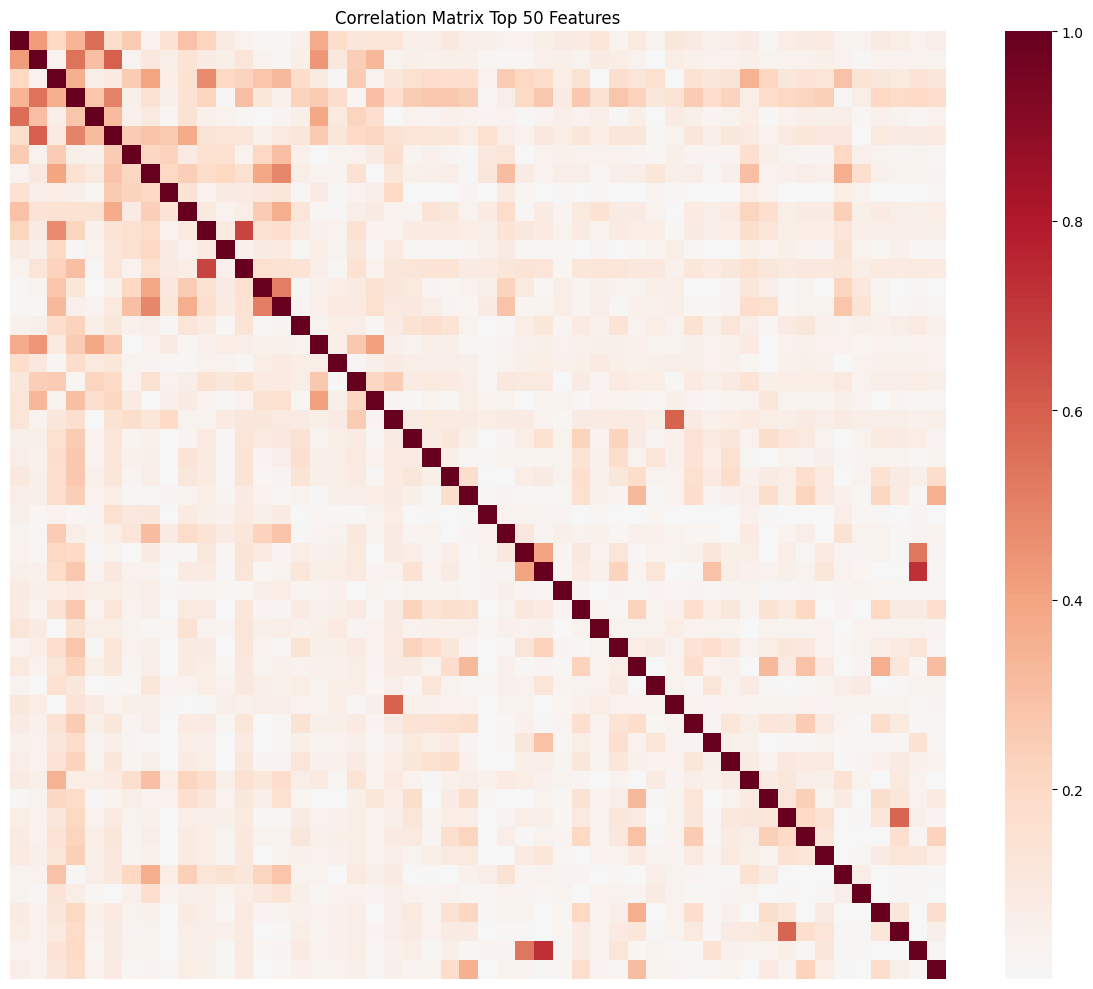


📋 RELATÓRIO FINAL DA SELEÇÃO DE FEATURES
Total de features inicial: 328
Features após MI: 328
Features após remoção de redundâncias: 287


In [3]:
# Executar a validação completa
mi_df_final = sml.validate_feature_selection(
    df=df,
    feature_names=feature_columns,
    target='origin',
    top_n_range=range(10, 101, 10),  # Testa de 10 a 100 features em steps de 10
    cv_folds=5,
    correlation_threshold=0.8
)
mi_df_final.to_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_geral.csv", index=False)

In [3]:
top_features = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_geral.csv")
top20_features = top_features.head(20)

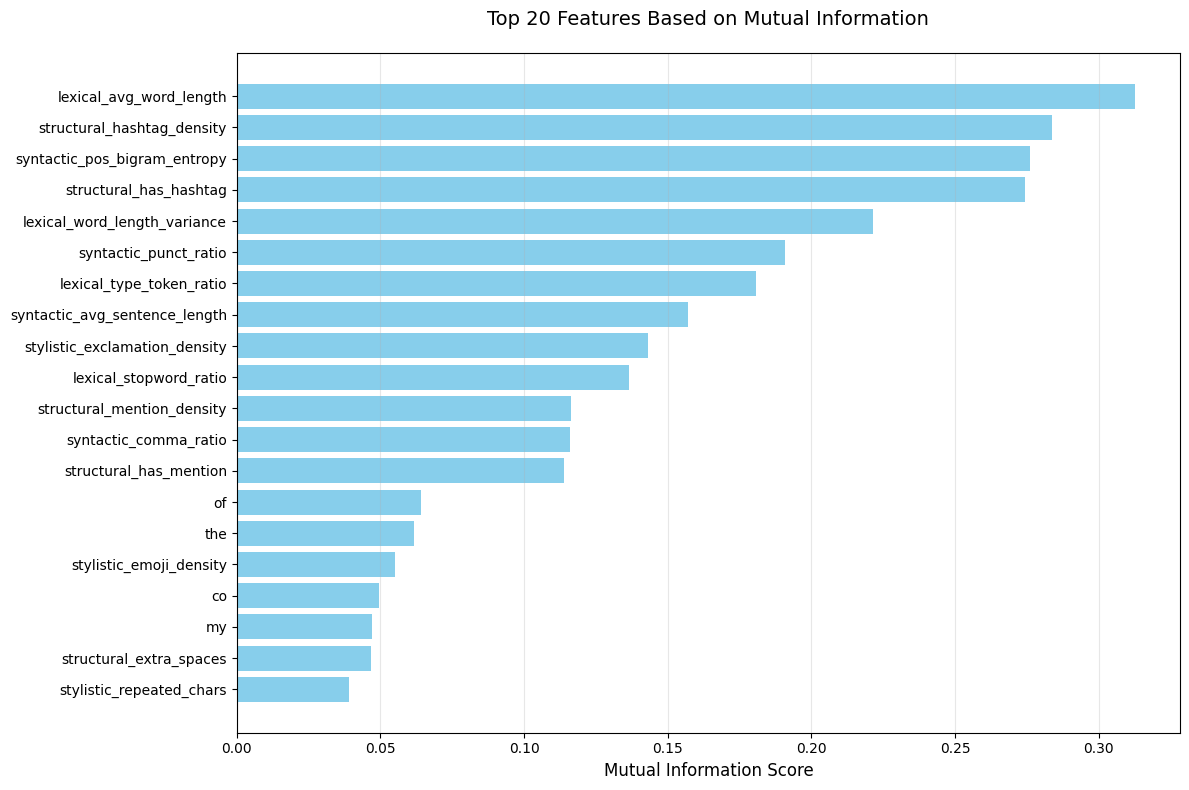

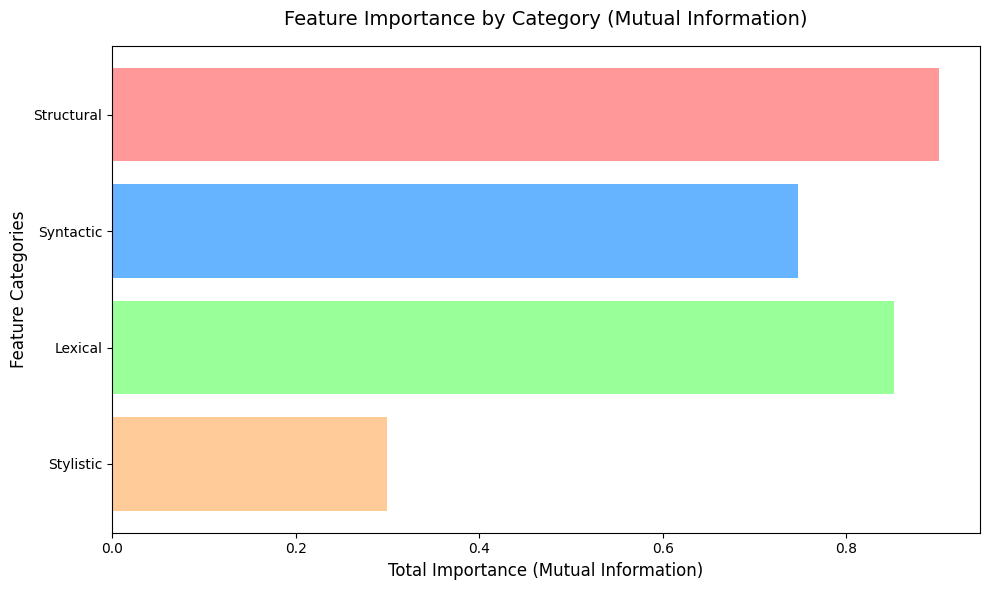

In [5]:
categories = {
    'Structural': ['structural'],
    'Syntactic': ['syntactic'],
    'Lexical': ['lexical'],
    'Stylistic': ['stylistic']
}

sml.plot_feature_20importance(top20_features)
sml.plot_feature_importance(top_features, top_n=20, categories=categories)

In [4]:
X = df[top20_features['feature'].tolist()]
y = df['origin'].astype(int)

In [5]:
#VERIFICAÇÃO DE OUTLIERS 
outliers = {}

for col in X.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Índices com outliers
    outlier_idx = df[(df[col] < lower) | (df[col] > upper)].index
    outliers[col] = len(outlier_idx)

# Mostrar número de outliers por coluna
outliers

{'lexical_avg_word_length': 573,
 'structural_hashtag_density': 1226,
 'syntactic_pos_bigram_entropy': 664,
 'structural_has_hashtag': 0,
 'lexical_word_length_variance': 1175,
 'syntactic_punct_ratio': 467,
 'lexical_type_token_ratio': 342,
 'syntactic_avg_sentence_length': 1945,
 'stylistic_exclamation_density': 1662,
 'lexical_stopword_ratio': 141,
 'structural_mention_density': 1976,
 'syntactic_comma_ratio': 912,
 'structural_has_mention': 0,
 'of': 175,
 'the': 878,
 'stylistic_emoji_density': 1539,
 'co': 1434,
 'my': 1878,
 'structural_extra_spaces': 4910,
 'stylistic_repeated_chars': 3547}

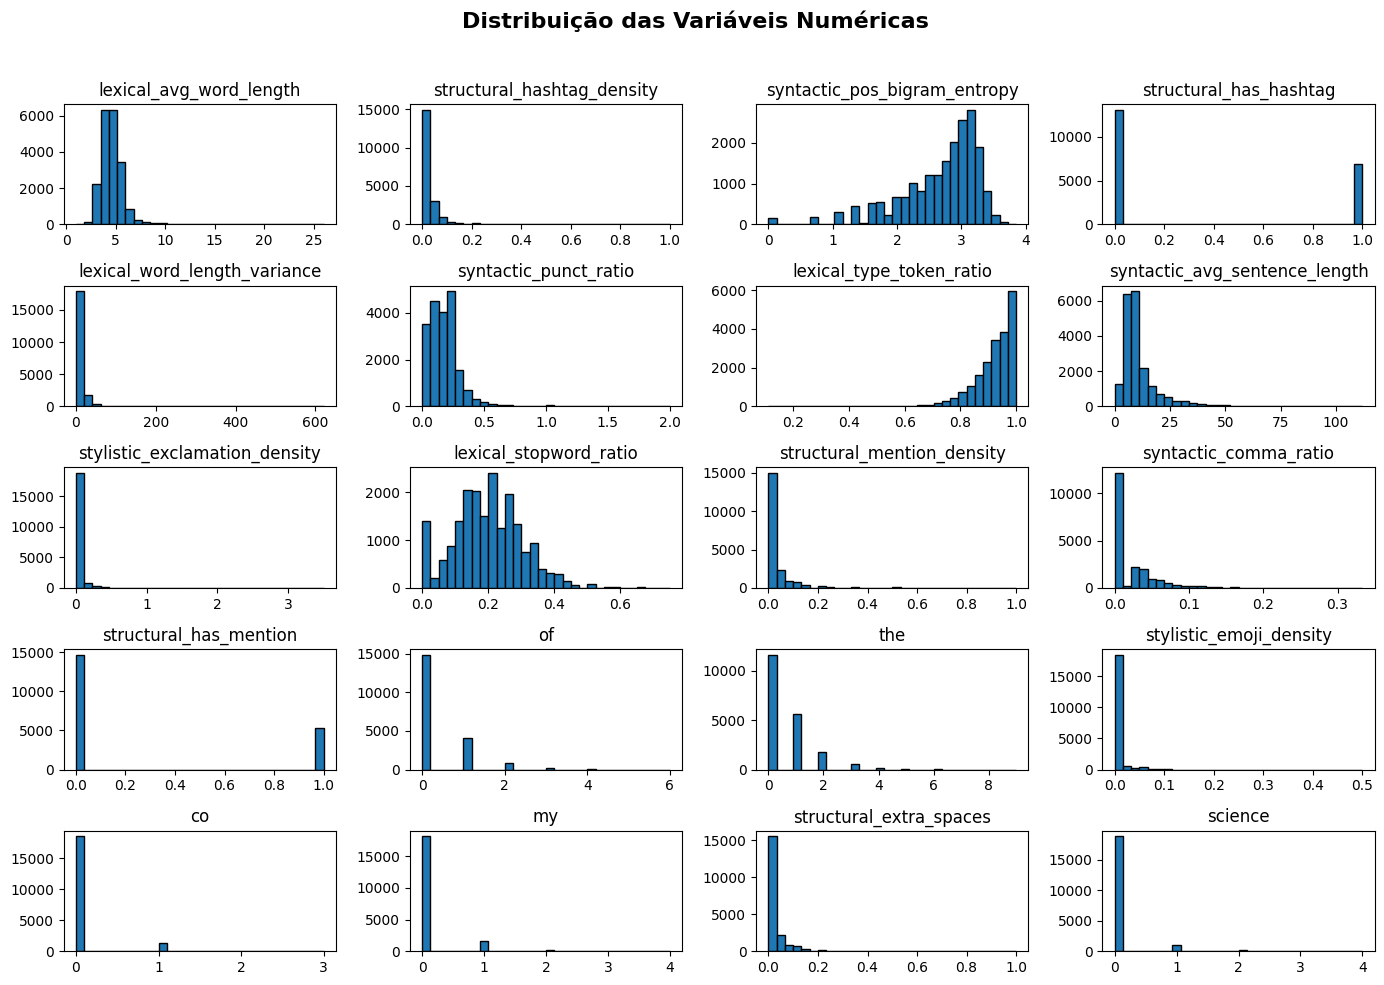

In [8]:
X.hist(figsize=(14,10), bins=30, edgecolor='black', grid=False)
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o título
plt.show()


📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
----------------------------------------
accuracy    : 0.9649 ± 0.0046
precision   : 0.9766 ± 0.0046
recall      : 0.9527 ± 0.0064
f1          : 0.9645 ± 0.0047
roc_auc     : 0.9894 ± 0.0020 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9667
Precision: 0.9824
Recall   : 0.9505
F1-Score : 0.9662
ROC-AUC  : 0.9906


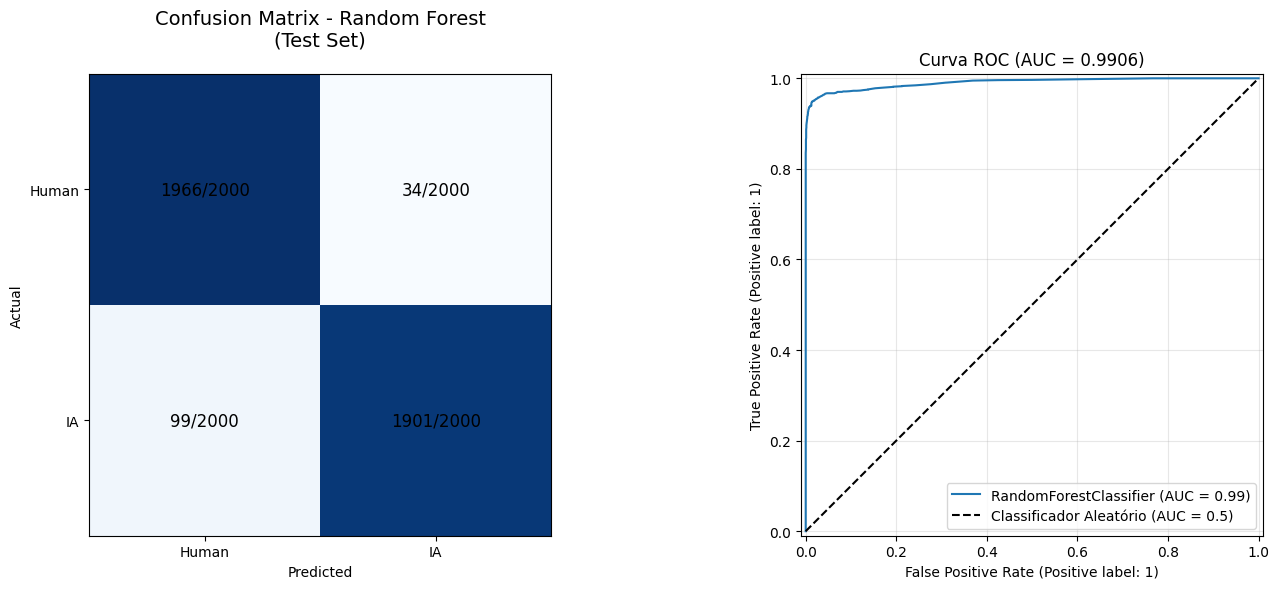

(RandomForestClassifier(n_jobs=-1, random_state=42),
 array([[1966,   34],
        [  99, 1901]]),
 {'test_accuracy': array([0.9625 , 0.96175, 0.96175, 0.97375, 0.965  ]),
  'test_precision': array([0.97828335, 0.97045339, 0.9767682 , 0.98415943, 0.97352342]),
  'test_recall': array([0.946 , 0.9525, 0.946 , 0.963 , 0.956 ]),
  'test_f1': array([0.96187087, 0.96139288, 0.96113792, 0.97346475, 0.96468214]),
  'test_roc_auc': array([0.98690612, 0.98989825, 0.98817462, 0.99273663, 0.98940075])})

In [6]:
sml.random_forest_pipeline(X, y)

🔍 Classificação Binária: Classes [0 1]
📊 Distribuição:
   Classe 0: 10000 amostras
   Classe 1: 10000 amostras
🔧 Pré-processamento:
   StandardScaler: 1 features
   MinMaxScaler: 12 features

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (Logistic Regression):
------------------------------------------------------------
accuracy    : 0.9544 ± 0.0037
precision   : 0.9623 ± 0.0043
recall      : 0.9458 ± 0.0063
f1          : 0.9540 ± 0.0038
roc_auc     : 0.9831 ± 0.0024 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9545
Precision: 0.9652
Recall   : 0.9430
F1-Score : 0.9540
ROC-AUC  : 0.9838


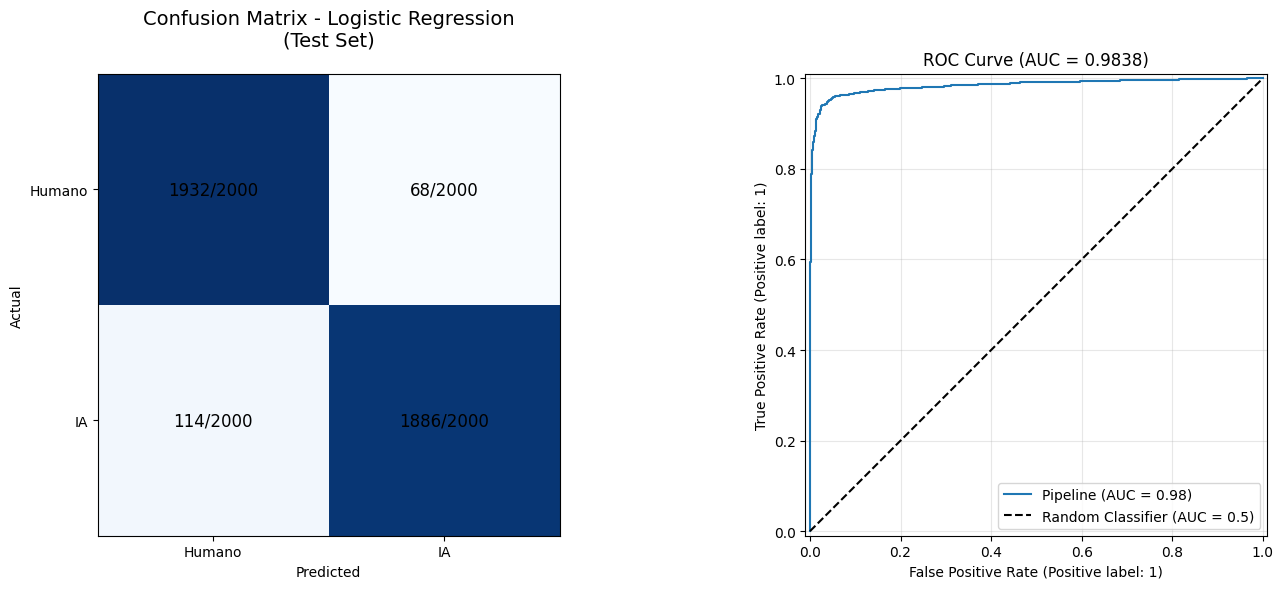


🎯 TOP 15 COEFICIENTES MAIS IMPORTANTES:
----------------------------------------
 1. structural_extra_spaces  : - 9.9202
 2. stylistic_emoji_density  : + 7.4856
 3. syntactic_punct_ratio    : + 5.2656
⚠️  Não foi possível extrair coeficientes: list index out of range


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('standard', StandardScaler(),
                                                   ['lexical_avg_word_length']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['structural_hashtag_density',
                                                    'structural_extra_spaces',
                                                    'stylistic_exclamation_density',
                                                    'stylistic_emoji_density',
                                                    'stylistic_repeated_chars',
                                                    'syntactic_punct_ratio',
                                                    'structural_has_hashtag',
                                                    'structural_has_mention',
                            

In [7]:
sml.logistic_regression_pipeline(X, y, test_size=0.2, random_state=42, cv=5, max_iter=1000)

🔍 Classes: [0 1]
📊 Distribuição: [10000 10000]
🔄 Executando validação cruzada...



📊 RESULTADOS DA VALIDAÇÃO CRUZADA (SVM):
------------------------------------------------------------
accuracy    : 0.9568 ± 0.0030
precision   : 0.9749 ± 0.0028
recall      : 0.9378 ± 0.0056
f1          : 0.9560 ± 0.0032
roc_auc     : 0.9837 ± 0.0020
🔧 Treinando modelo final...

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9593
Precision: 0.9718
Recall   : 0.9460
F1-Score : 0.9587
ROC-AUC  : 0.9856


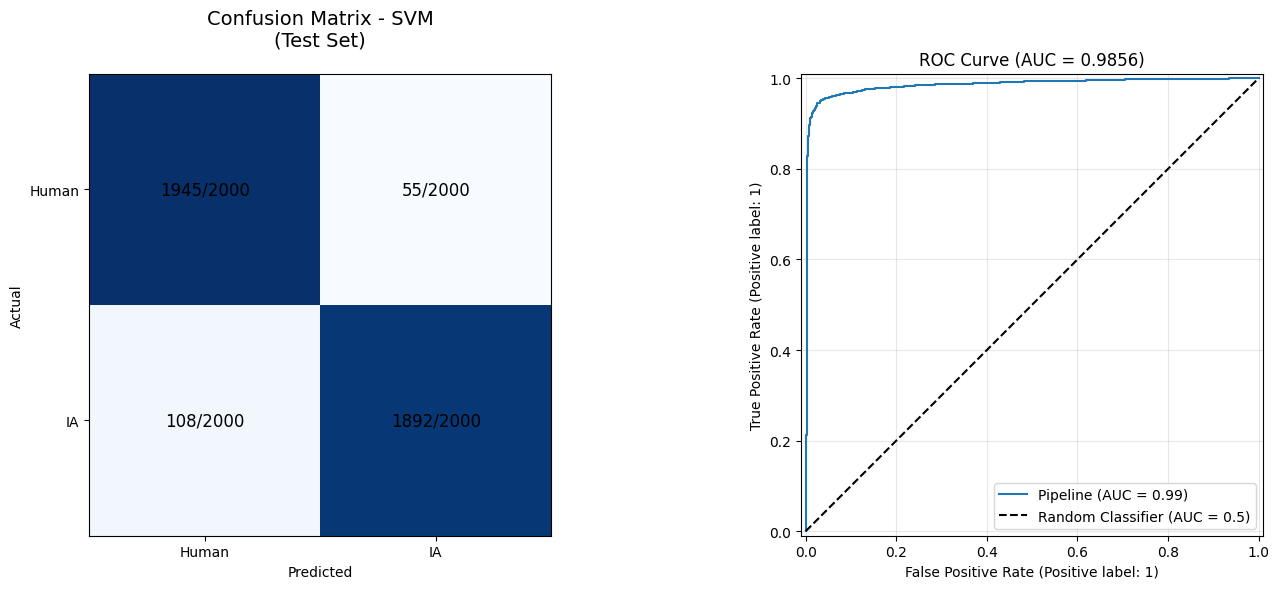

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('scaler', StandardScaler(),
                                                   Index(['lexical_avg_word_length', 'structural_hashtag_density',
        'syntactic_pos_bigram_entropy', 'structural_has_hashtag',
        'lexical_word_length_variance', 'syntactic_punct_ratio',
        'lexical_type_token_ratio', 'syntactic_avg_sentence_length',
        'st..._density', 'lexical_stopword_ratio',
        'structural_mention_density', 'syntactic_comma_ratio',
        'structural_has_mention', 'of', 'the', 'stylistic_emoji_density', 'co',
        'my', 'structural_extra_spaces', 'stylistic_repeated_chars'],
       dtype='object'))])),
                 ('classifier',
                  CalibratedClassifierCV(cv=3,
                                         estimator=SVC(class_weight='balanced',
                                                       kerne

In [8]:
sml.svm_pipeline(X, y, test_size=0.2, random_state=42, cv=5, kernel="linear")

In [9]:
df = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/df_geral_com_features2.csv")
feature_columns = [col for col in df.columns if col not in ['text', 'origin']]

📊 Calculando Mutual Information...
🔍 Removendo features redundantes...
   🗑️  Removendo 'ai' (coluna especificada)
   🗑️  Removendo 'intelligence' (coluna especificada)
   🗑️  Removendo 'artificial intelligence' (coluna especificada)
   🗑️  Removendo 'artificial' (coluna especificada)
   🗑️  Removendo 'education' (coluna especificada)
   🗑️  Removendo 'students' (coluna especificada)
   🔄 Removendo 'lexical_unique_words' (correlacionada com 'syntactic_pos_bigram_entropy': 0.866)
   🔄 Removendo 'lexical_word_count' (correlacionada com 'syntactic_pos_bigram_entropy': 0.832)
   🔄 Removendo 'syntactic_pos_tag_entropy' (correlacionada com 'syntactic_pos_bigram_entropy': 0.884)
   🔄 Removendo 'lexical_type_token_ratio' (correlacionada com 'ai_perplexity_score': 1.000)
   🔄 Removendo 'complexity_rare_words' (correlacionada com 'lexical_stopword_ratio': 0.847)
   🔄 Removendo 'https co' (correlacionada com 'co': 0.865)
   🔄 Removendo 'https' (correlacionada com 'co': 0.809)
   🔄 Removendo 'the 

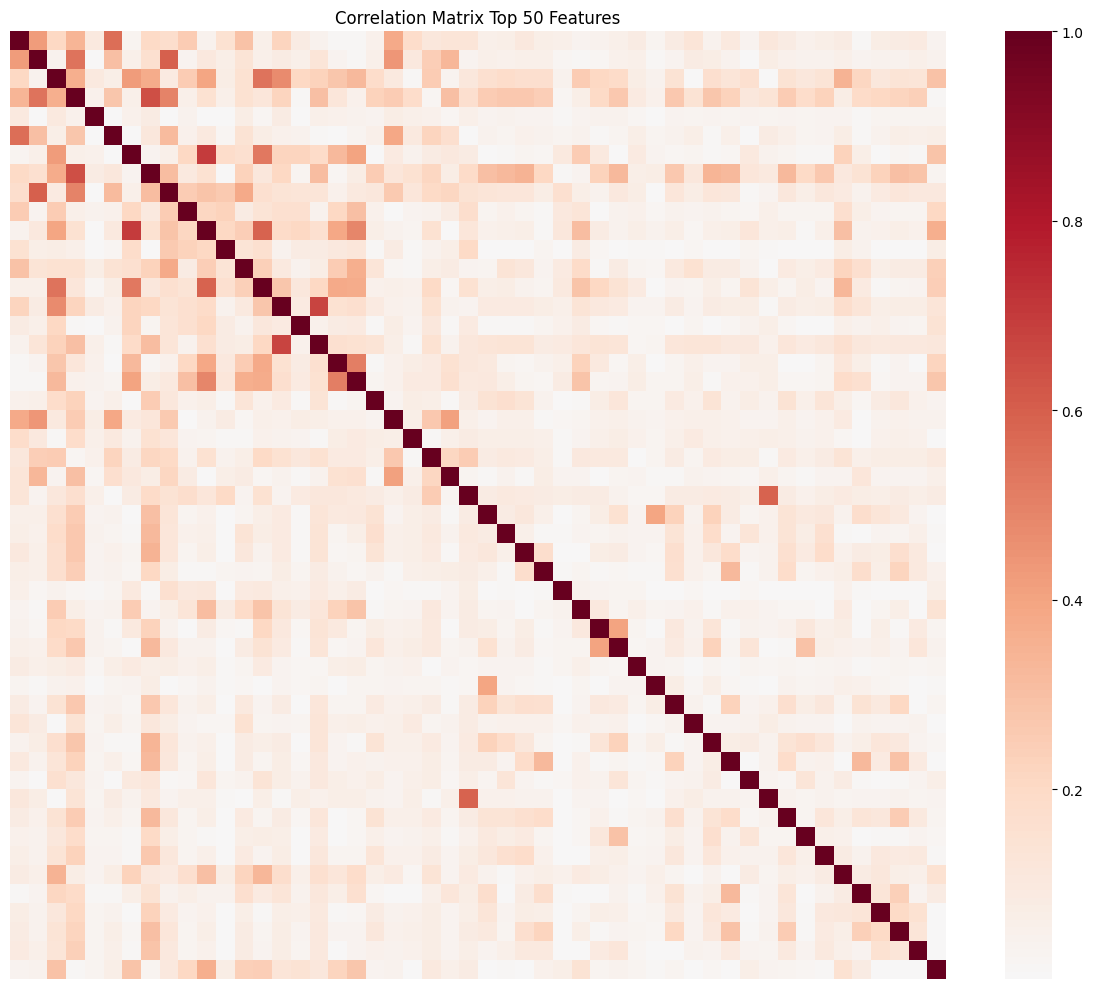


📋 RELATÓRIO FINAL DA SELEÇÃO DE FEATURES
Total de features inicial: 355
Features após MI: 355
Features após remoção de redundâncias: 306


In [13]:
# Exemplo de uso:
mi_df_final = sml.validate_feature_selection(
    df=df,
    feature_names=feature_columns,
    target='origin',
    top_n_range=range(10, 101, 10),  # Testa de 10 a 100 features em steps de 10
    cv_folds=5,
    correlation_threshold=0.8
)
mi_df_final.to_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_geral2.csv", index=False)

In [10]:
top_features = pd.read_csv("/home/tammy.kojima/Authorship-attribution/df_pronto/top_features_geral2.csv")
top20_features = top_features.head(20)

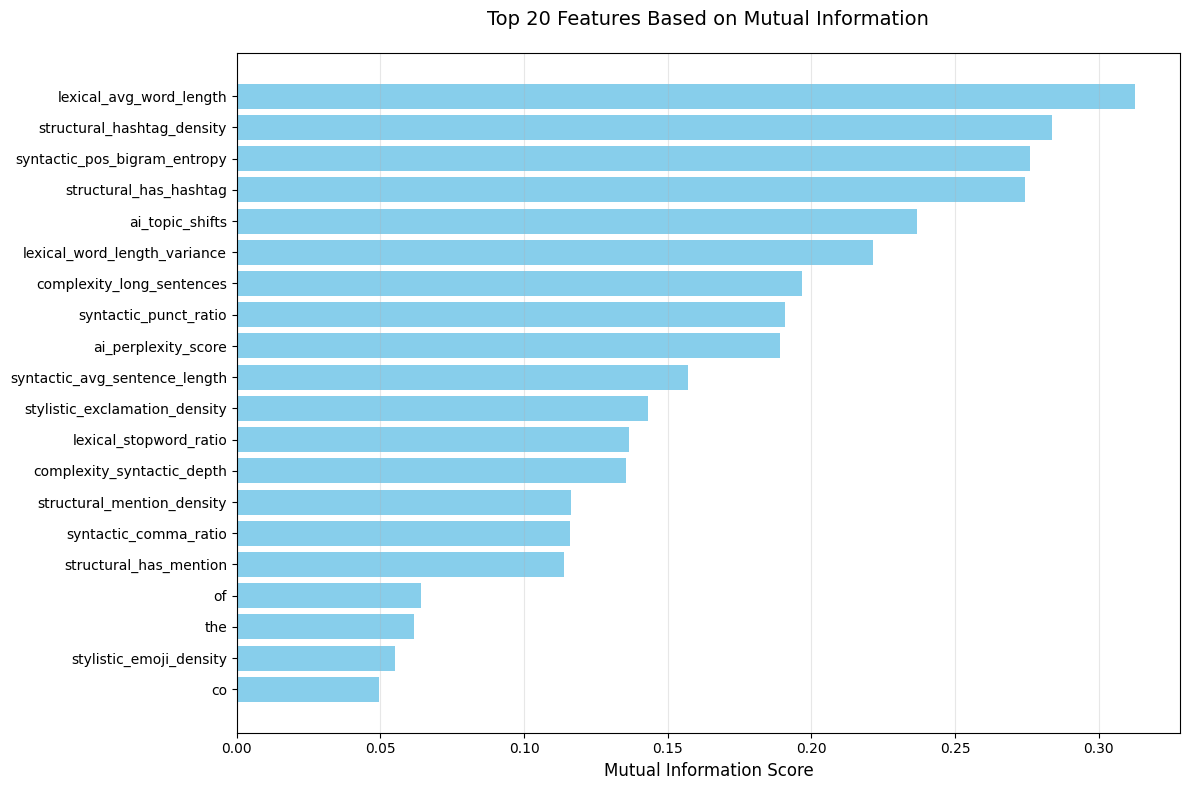

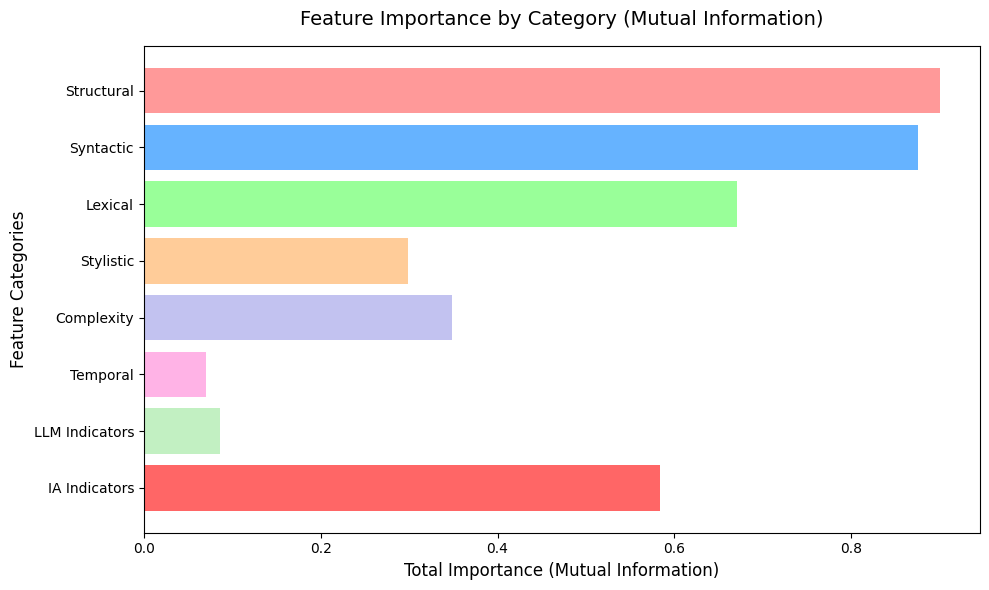

In [7]:
categories = {
    'Structural': ['structural'],
    'Syntactic': ['syntactic'],
    'Lexical': ['lexical'],
    'Stylistic': ['stylistic'],
    'Complexity': ['complexity'],
    'Temporal': ['temporal'],
    'LLM Indicators': ['llm', 'mistral', 'chatgpt'],
    'IA Indicators': ['ai']
}

sml.plot_feature_20importance(top20_features)
sml.plot_feature_importance(top_features, top_n=20, categories=categories)

In [11]:
X = df[top20_features['feature'].tolist()]
y = df['origin']


📊 RESULTADOS DA VALIDAÇÃO CRUZADA:
----------------------------------------
accuracy    : 0.9622 ± 0.0047
precision   : 0.9761 ± 0.0047
recall      : 0.9476 ± 0.0064
f1          : 0.9616 ± 0.0048
roc_auc     : 0.9868 ± 0.0022 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9643
Precision: 0.9828
Recall   : 0.9450
F1-Score : 0.9635
ROC-AUC  : 0.9875


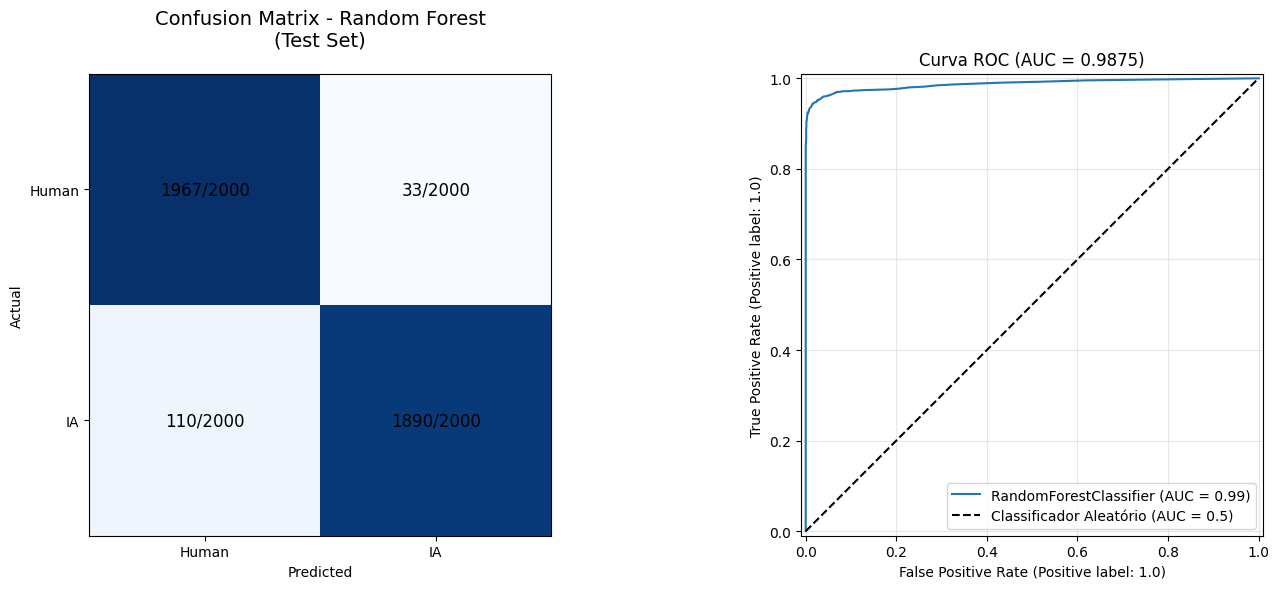

(RandomForestClassifier(n_jobs=-1, random_state=42),
 array([[1967,   33],
        [ 110, 1890]]),
 {'test_accuracy': array([0.958  , 0.95975, 0.95975, 0.97125, 0.96225]),
  'test_precision': array([0.97510373, 0.96937213, 0.97667185, 0.98407807, 0.97532134]),
  'test_recall': array([0.94  , 0.9495, 0.942 , 0.958 , 0.9485]),
  'test_f1': array([0.95723014, 0.95933316, 0.95902265, 0.97086395, 0.9617237 ]),
  'test_roc_auc': array([0.9833385 , 0.9870365 , 0.985728  , 0.99007612, 0.98758112])})

In [12]:
sml.random_forest_pipeline(X, y, test_size=0.2, random_state=42, n_estimators=100)

🔍 Classificação Binária: Classes [0. 1.]
📊 Distribuição:
   Classe 0.0: 10000 amostras
   Classe 1.0: 10000 amostras
🔧 Pré-processamento:
   StandardScaler: 1 features
   MinMaxScaler: 9 features

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (Logistic Regression):
------------------------------------------------------------
accuracy    : 0.9459 ± 0.0043
precision   : 0.9540 ± 0.0052
recall      : 0.9369 ± 0.0059
f1          : 0.9454 ± 0.0044
roc_auc     : 0.9777 ± 0.0027 (baseado em 5/5 folds válidos)

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9473
Precision: 0.9585
Recall   : 0.9350
F1-Score : 0.9466
ROC-AUC  : 0.9789


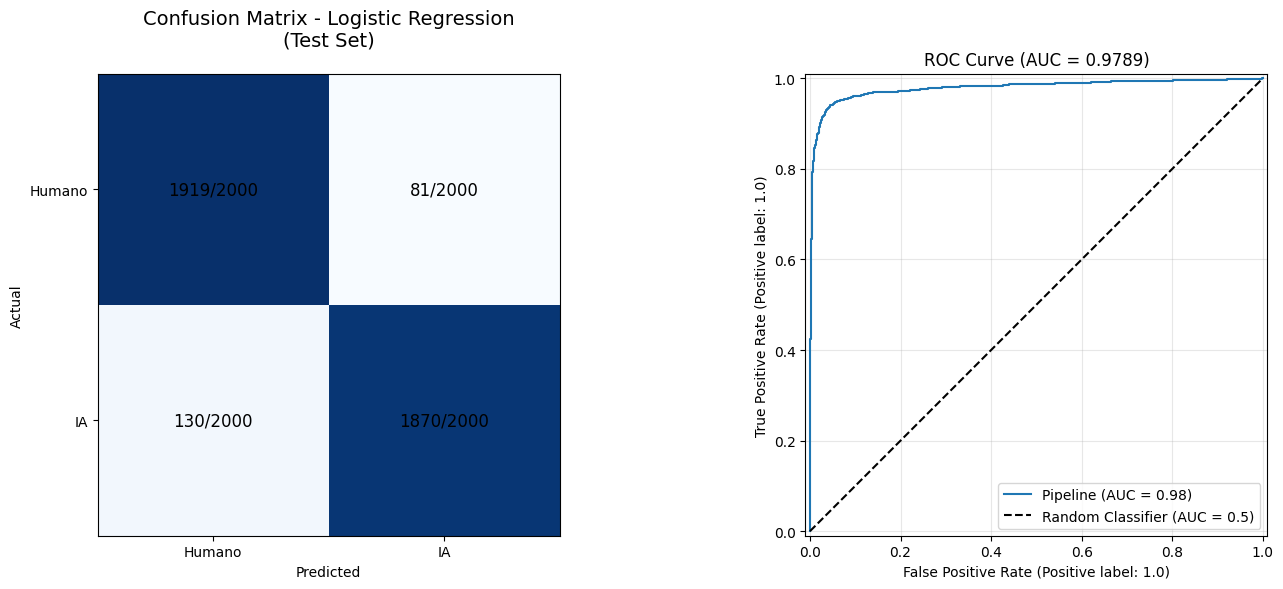


🎯 TOP 15 COEFICIENTES MAIS IMPORTANTES:
----------------------------------------
 1. stylistic_emoji_density  : + 9.1145
 2. lexical_word_length_variance: - 6.3023
 3. syntactic_punct_ratio    : + 4.7088
⚠️  Não foi possível extrair coeficientes: list index out of range


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('standard', StandardScaler(),
                                                   ['lexical_avg_word_length']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['structural_hashtag_density',
                                                    'stylistic_exclamation_density',
                                                    'stylistic_emoji_density',
                                                    'syntactic_punct_ratio',
                                                    'structural_has_hashtag',
                                                    'structural_has_mention',
                                                    'lexical_word_length_variance',
                                                    'syntactic_comma_ratio',
                          

In [13]:
sml.logistic_regression_pipeline(X, y, test_size=0.2, random_state=42, cv=5, max_iter=1000)

🔍 Classes: [0. 1.]
📊 Distribuição: [10000 10000]
🔄 Executando validação cruzada...

📊 RESULTADOS DA VALIDAÇÃO CRUZADA (SVM):
------------------------------------------------------------
accuracy    : 0.9514 ± 0.0035
precision   : 0.9706 ± 0.0045
recall      : 0.9310 ± 0.0079
f1          : 0.9504 ± 0.0038
roc_auc     : 0.9784 ± 0.0018
🔧 Treinando modelo final...

📈 MÉTRICAS NO CONJUNTO DE TESTE:
------------------------------
Accuracy : 0.9493
Precision: 0.9596
Recall   : 0.9380
F1-Score : 0.9487
ROC-AUC  : 0.9808


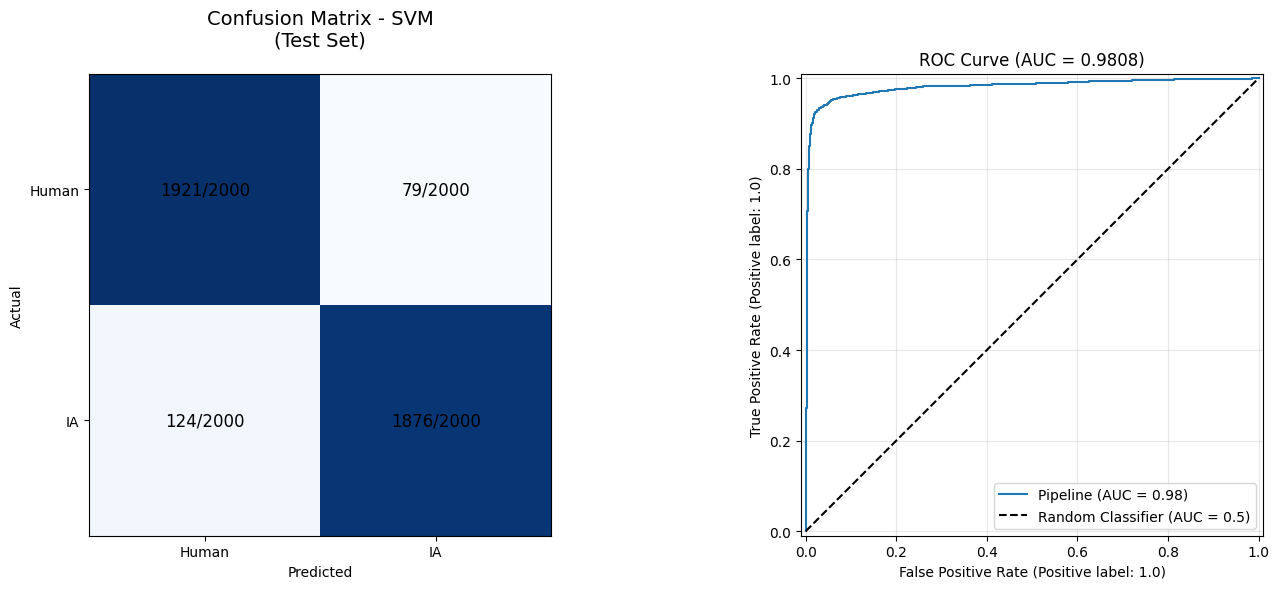

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('scaler', StandardScaler(),
                                                   Index(['lexical_avg_word_length', 'structural_hashtag_density',
        'syntactic_pos_bigram_entropy', 'structural_has_hashtag',
        'ai_topic_shifts', 'lexical_word_length_variance',
        'complexity_long_sentences', 'syntactic_punct_ratio',
        'ai_perplexity_s...ength',
        'stylistic_exclamation_density', 'lexical_stopword_ratio',
        'complexity_syntactic_depth', 'structural_mention_density',
        'syntactic_comma_ratio', 'structural_has_mention', 'of', 'the',
        'stylistic_emoji_density', 'co'],
       dtype='object'))])),
                 ('classifier',
                  CalibratedClassifierCV(cv=3,
                                         estimator=SVC(class_weight='balanced',
                                                     

In [14]:
sml.svm_pipeline(X, y, test_size=0.2, random_state=42, cv=5, kernel="linear")